<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/SVMForIrisDataset/blob/main/SVM_Para_Dataset_de_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johan Santana Galván

In [43]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Vemos que tenemos 3 tipos de especies de flores en el dataset

In [44]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
 X, y, test_size=0.3, random_state=1, stratify=y)

Cogemos datos de test y de entrenamiento para tener un buen modelo.

In [45]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(ytrain))
print('Labels counts in y_test:', np.bincount(ytest))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Esta parte no es tan necesaria para este dataset pero escalamos los datos para una mejor precisión en nuestros resultados.

In [46]:
from sklearn.preprocessing import StandardScaler
#Se escalan los datos.

sc = StandardScaler()
sc.fit(Xtrain)
X_train_std = sc.transform(Xtrain)
X_test_std = sc.transform(Xtest)

Importamos el svm y le pasamos los datos de entrenamiento.

In [47]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, ytrain)

SVC(kernel='linear', random_state=1)

Predecimos cuánto nos va a dar el svm con los datos de test ya escalados y evaluamos la cantidad de veces que ytest no coincide con el valor predicho.

In [48]:
y_pred = svm.predict(X_test_std)
print('Misclassified examples: %d' % (ytest != y_pred).sum())

Misclassified examples: 1


Vemos que tenemos un accuracy de 0.978

In [49]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(ytest, y_pred))

Accuracy: 0.978


Esta función lo que hace es generar la nube de puntos, cargarla y gestionar toda la lógica para que se vea bien la gráfica.

In [53]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

 markers = ('o', 's', '^')
 colors = ('red', 'blue', 'lightgreen')

 cmap = ListedColormap(colors[:len(np.unique(y))])

 # Calcula los límites de la primera característica de entrada (X[:, 0]).
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

 # Calcula los límites de la segunda característica de entrada (X[:, 1]).
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

 # Crea una malla de puntos (xx1 y xx2) utilizando la función meshgrid de NumPy con una resolución dada.
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))

 # Predice las etiquetas para cada punto en la malla utilizando el clasificador.
 lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

 # Ajusta la forma de las etiquetas predichas para que coincida con las dimensiones de la malla.
 lab = lab.reshape(xx1.shape)

 # Dibuja las regiones de decisión del clasificador en el gráfico como áreas de color.
 plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

 # Establece los límites en el eje x del gráfico.
 plt.xlim(xx1.min(), xx1.max())

 # Establece los límites en el eje y del gráfico.
 plt.ylim(xx2.min(), xx2.max())

 # Tanto el for como el if se encarga de pintar las gráficas
 for idx, cl in enumerate(np.unique(y)):
  class_labels = ['Setosa', 'Versicolor', 'Virginica']
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'{class_labels[idx]}', edgecolor='black')

 if test_idx:
  Xtest, ytest = X[test_idx, :], y[test_idx]
  plt.scatter(Xtest[:, 0], Xtest[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')

In [51]:
# Mete ambos valores de forma vertical y horizontal respectivamente.
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((ytrain, ytest))

Finalmente pintamos la gráfica.

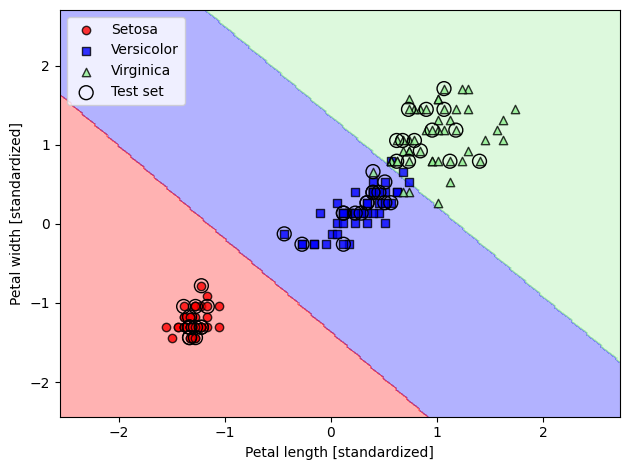

In [52]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()
